In [1]:
import nltk
import konlpy
from nltk import word_tokenize
from konlpy.tag import Okt
t= Okt()

In [2]:
text = '''
지금 감기로 인해서 약을 먹고 있고 지금 한참 전부터 혈압으로 인해 고혈압 약도 먹고 있어요. 
감기약이랑 같이 병행해서 꾸준하게 먹는 거는 고혈압 약 하나밖에 없습니다. 
아니요. 혼자 살고 있어서 연락은 하고 있지 않습니다. 
결혼하지 않고 혼자 살고 있습니다.
되게 답답하고 지금 장기적으로 체납이 되고 있는 상황이고요 그래서 지금 벗어나고 싶은 심정이네요.
몸이 안 좋아요. 일을 할 수 있는 정도가 아닙니다. 
아르바이트를 단기적으로 조금씩 하고 있는 상황입니다.
예 일을 못하고 있습니다.
네 좀 힘들 것 같아요. 방문을 해 주시면 감사할 것 같습니다. 
네 감사합니다.
'''

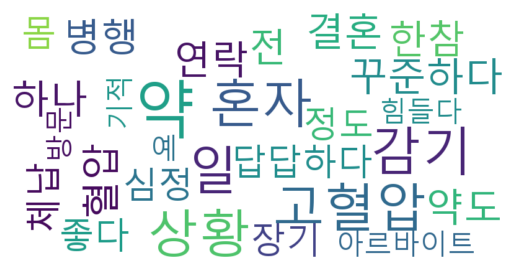

[('연락', 1), ('결혼', 1), ('답답하다', 1), ('장기', 1), ('체납', 1), ('심정', 1), ('몸', 1), ('좋다', 1), ('정도', 1), ('아르바이트', 1), ('기적', 1), ('예', 1), ('힘들다', 1), ('방문', 1), ('감기', 2), ('고혈압', 2), ('혼자', 2), ('상황', 2), ('일', 2), ('약', 3)]


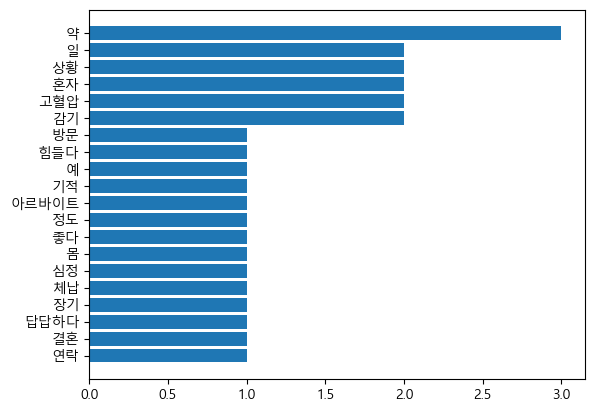

In [3]:
from wordcloud import WordCloud
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
from pykospacing import Spacing

spacing = Spacing()
const_doc = spacing(text)
tokens_const = [word for word, pos in t.pos(const_doc, stem=True) if pos in ('Noun','Adjective')]
tokens_const = [token for token in tokens_const if token not in ['좀','혹시','지금','이제','상담사','조금','말씀','저희','계층','사회','못','그','것','있다',
                                                                 '줄','수','더','구','있나','한지','돼','거','없다','뭔가','요','네','아니다',
                                                                 '같다','살','인하다','안','고요','주시','해','이다']]



def generate_wordcloud(word_counts, font_path, max_font_size=100, width=800, height=400, background_color='white', max_words=50):
    wordcloud = WordCloud(
        font_path=font_path,
        max_font_size=max_font_size,
        width=width,
        height=height,
        background_color=background_color,
        max_words=max_words
    )

    wordcloud.generate_from_frequencies(word_counts)

    plt.axis("off")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

def word_graph_and_wordcloud(tokens_const, max_words=10):
    # 한글 폰트 설정
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

    # 사용할 폰트 경로 설정
    font_path = "c:/Windows/Fonts/malgun.ttf"

    # 토큰 빈도수 계산
    const_cnt = {}
    for word in tokens_const:
        const_cnt[word] = const_cnt.get(word, 0) + 1

    # Word Cloud 생성 및 표시
    generate_wordcloud(const_cnt, font_path)

    # 막대 그래프 표시
    sorted_w = sorted(const_cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])
    
    plt.barh(range(len(n)), w, tick_label=n)
    plt.show()

# tokens_const는 미리 정의되어 있다고 가정합니다.
word_graph_and_wordcloud(tokens_const, max_words=20)


C:\Users\UserK\AppData\Local\Temp\ipykernel_21220\3711418862.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y = 'Count', data=data, palette='rocket')


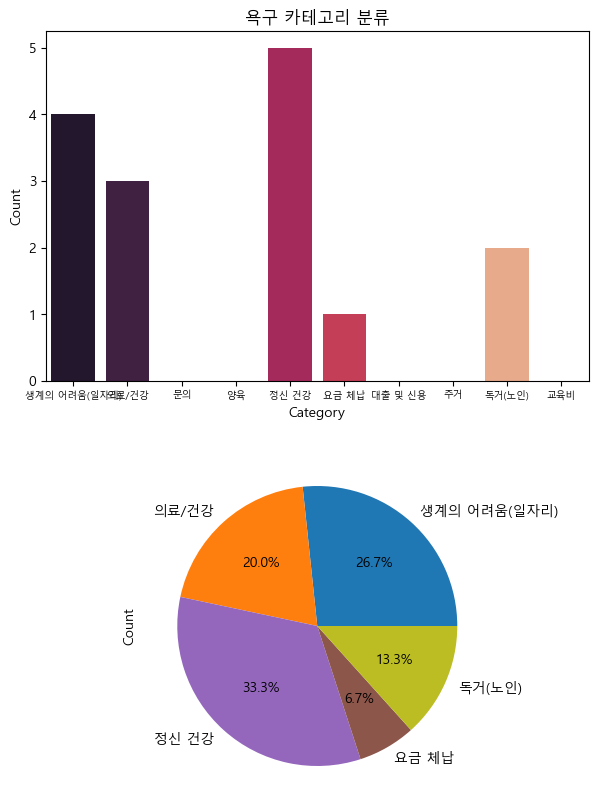

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def visualize_weighted_count(counts, category_names):
    data = pd.DataFrame({
        'Category': category_names,
        'Count' : counts
    #     'Weighted Count': [count * weight for count, weight in zip(counts, weights)]
    })
    data['Rank'] = data['Count'].rank(ascending=False, method='dense').astype(int)
    palette = sns.color_palette("viridis", n_colors=len(data))

    # 그래프 그리기
    plt.figure(figsize=(7, 10))
    plt.subplot(2,1,1)
    sns.barplot(x='Category', y = 'Count', data=data, palette='rocket')
    plt.xticks(fontsize=7)
    plt.title('욕구 카테고리 분류')
    
    plt.subplot(2,1,2)
    pie_chart = data['Count'].plot.pie(autopct=lambda p: f'{p:.1f}%' if p > 0 else '', labels=data['Category'])

# 각 섹션에 해당하는 카테고리 이름을 레이블로 추가
    # for count, label in zip(data['Count'], data['Category']):
    #   pie_chart.text(0, 0, f'{count}:\n{label}', fontsize=10)
    # plt.title('욕구 카테고리 분류')
    plt.show()

def main():
    list_1 =['생활비','생활','형편','통장','빌리다','모으다','지출','월세','코로나','월급','수입','직장',
             '일자리','회사','근무','일용직','아르바이트','대리운전','그만두다','퇴사','잔고','퇴직금','재취업',
             '이력서','노력','포기','취업','취직','도움','힘들다','어려운','버티다','부담','어렵다','청하다',
             '실업','퇴직','실업급여','일용직','사장님','잘리다','직장','일','실직','알바']
    list_2 = ['병원','치료','수술','진단','검사','진료','입원','응급실','복용','처방','수면제','정신과','백신',
              '진통제','항암','약물','물리치료','아픈','심한','통증','증상','질병','골절','후유증','마비','병원비','비용','의료비','치료비','수술비',
              '비급여','약값','입원비','가병비','허리','다리','머리','어깨','무릎','발목','손목','목','허리',
              '정형외과','당뇨','고혈압','뇌출혈','뇌경색','조현병','혈압','심장','두통','신장','유방암','교통사고','사고',
              '방치','산재','다치다','쓰러지다','넘어지다','일상생활','움직이다','재활','재발','요양병원','간병',
              '대학병원','보호자','중환자실','요양원','간병인','보건소','산정특례','항생제']
    list_3 = ['실무자','구청','직원','관할','심사','행정복지센터','안내','통보','온라인','내용',
              '이해','설명','전달','기다리다','답변','서류','제출','접수','신청','진단서','발급','문자','카톡']
    list_4 = ['아이','이혼','한부모','가정','딸아이','큰아이','아이아빠','애아빠','이혼후','키우다','양육','맡기다',
              '같이 살다','양육비','학원비','학비','학교','대학','학원','수업','재학중','초등학교','중학교','고등학교',
              '대학생','졸업','독립','입학','학업','진학','자취','공부','기숙사','힉생']
    list_5 = ['우울','우울증','공황장애','불안장애','스트레스','대인기피증','불면증','불안정','자살시도','극단적',
              '긴급지원','상담','의지','용기','혼자','정신과','답답하다','피하다','떠나다','미루다','무너지다','무섭다',
              '두렵다','괴롭다','자해','자살','힘들다','쓸쓸하다','심정']
    list_6 = ['스마트폰','공과금','관리비','전기','건강보험료','가스비','세금','임대료','도시가스','의료보험','보험료',
              '통신비','교통비','집세','수도세','연체','체납','요금','끊기다','정지','중단','압류','밀리다',
              '단전','단수','단가스','전기료','국민연금','주거관리비','내다']
    list_7 = ['대출금','대출이자','전세대출','신용대출','담보','담보대출','보증','신용카드','부채','높은',
              '채무','상환','카드값','쌓이다','개인회생','신용불량','신용불량자','신용','신용회복위원회','막히다',
              '카드론','입금','계좌','은행','금융권','사업실패','파산','벅찬','허덕이다','신용불량']
    list_8 = ['반지하','주거','아파트','전세','월세집','임대주택','임대아파트','전세임대','당첨','청약','선정','생활지원',
              '계약','집주인','재계약','만기','만료','부동산','입주','경매','전세사기','보증금','이사비용','이사']
    list_9 = ['거주','오래','주택','환경','주거환경','임대','건물','공사','수리','교체','치아','노후','임플란트','보일러',
              '바닥','장판','화장실','음식','관리','여름','곰팡이','심각한','기초','독거노인','노인','고령','제공','거부','혼자']
    list_10 = ['교육비','교육','급여','소득','재산','혜택','복지혜택','기준','조건']

    category_lists = [list_1, list_2, list_3, list_4, list_5, list_6,list_7,list_8,list_9,list_10]
    # weights = [3.4, 2.7, 3, 2.7, 2.4, 3.6]

    category_names = ["생계의 어려움(일자리)", "의료/건강", "문의", "양육", "정신 건강", "요금 체납", "대출 및 신용","주거","독거(노인)","교육비"]

    # tokens_const는 미리 정의되어 있다고 가정합니다.
    counts = [sum(1 for token in tokens_const if token in category_list) for category_list in category_lists]

    # 결과 시각화
    visualize_weighted_count(counts, category_names)

if __name__ == "__main__":
    main()
